## https://catalog.data.gov/dataset/crash-reporting-drivers-data
## "Montgomery County's traffic collision data, logged via Maryland's ACRS and reported by various local law enforcement agencies, encapsulates details of each incident and involved parties.
## year 2015-2023
## Question:
## How do we predict the severity of a car crash?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:

file= pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")


/var/folders/z3/5tnf_b696zz2tmpkrnjqx_7h0000gn/T/ipykernel_13667/2076127266.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file= pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")


In [3]:
file

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,1/3/24 14:55,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/23 12:36,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,NaN,...,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/23 12:00,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,NaN,...,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/5/23 21:07,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,NaN,...,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/23 0:40,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,NaN,...,20,No,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172100,DM8338000C,16010228,Takoma Park Police Depart,Property Damage Crash,3/1/16 10:01,Municipality,NEW HAMPSHIRE SERVICE LA,Municipality,PRINCE GEORGES AVE,NaN,...,25,No,No,2016,FORD,EXPLORER,NO MISUSE,38.972560,-76.997466,"(38.97255976, -76.99746609)"
172101,MCP1182001S,170519976,Montgomery County Police,Property Damage Crash,7/19/17 14:22,County,CEDAR LA,Maryland (State),OLD GEORGETOWN RD,NaN,...,35,No,No,2008,NISSAN,ALTIMA,NO MISUSE,39.004640,-77.108502,"(39.00464, -77.10850167)"
172102,MCP1453008X,200046217,Montgomery County Police,Property Damage Crash,11/23/20 7:37,Maryland (State),RIDGE RD,Unknown,LITTLE SENECA PKWY,NaN,...,40,No,No,2008,CHEVROLET,EXPRESS,NO MISUSE,39.228963,-77.236757,"(39.22896333, -77.23675667)"
172103,MCP2568000M,190056701,Montgomery County Police,Property Damage Crash,11/23/19 23:23,County,SHADY GROVE RD,Ramp,RAMP 9 FR IS 370 EB TO SHADY GROVE RD,NaN,...,35,No,No,2018,FORD,TRANSIT VAN,NO MISUSE,39.120440,-77.180047,"(39.12043995, -77.18004738)"


In [4]:
#dropping unneeded colunms
file_without_some_columns = file.drop(['Off-Road Description','Municipality', 'Related Non-Motorist', 'Report Number', 'Local Case Number','Agency Name','ACRS Report Type',
                                      'Cross-Street Type','Cross-Street Name','Related Non-Motorist',
                                      'Person ID', 'Drivers License State', 'Vehicle ID','Vehicle Continuing Dir', 'Vehicle Going Dir', 
                                       'Parked Vehicle','Circumstance','Non-Motorist Substance Abuse' ], axis=1)
file_without_some_columns

,Crash Date/Time,Route Type,Road Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,...,Vehicle Movement,Speed Limit,Driverless Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,1/3/24 14:55,NaN,NaN,OPPOSITE DIRECTION SIDESWIPE,CLOUDY,NaN,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,...,MOVING CONSTANT SPEED,0,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,12/16/23 12:36,Maryland (State),GERMANTOWN RD,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,MOVING CONSTANT SPEED,35,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,12/29/23 12:00,Maryland (State),GREAT SENECA HWY,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,MOVING CONSTANT SPEED,35,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,11/5/23 21:07,Maryland (State),WOODFIELD RD,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,No,...,MOVING CONSTANT SPEED,40,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,11/18/23 0:40,Maryland (State),CLARKSBURG RD,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,YIELD SIGN,NONE DETECTED,Yes,...,MOVING CONSTANT SPEED,20,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172100,3/1/16 10:01,Municipality,NEW HAMPSHIRE SERVICE LA,OTHER,CLEAR,DRY,DAYLIGHT,NaN,NaN,No,...,SLOWING OR STOPPING,25,No,2016,FORD,EXPLORER,NO MISUSE,38.972560,-76.997466,"(38.97255976, -76.99746609)"
172101,7/19/17 14:22,County,CEDAR LA,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NaN,Yes,...,SLOWING OR STOPPING,35,No,2008,NISSAN,ALTIMA,NO MISUSE,39.004640,-77.108502,"(39.00464, -77.10850167)"
172102,11/23/20 7:37,Maryland (State),RIDGE RD,SAME DIR REAR END,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,No,...,SLOWING OR STOPPING,40,No,2008,CHEVROLET,EXPRESS,NO MISUSE,39.228963,-77.236757,"(39.22896333, -77.23675667)"
172103,11/23/19 23:23,County,SHADY GROVE RD,ANGLE MEETS LEFT TURN,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,...,MAKING LEFT TURN,35,No,2018,FORD,TRANSIT VAN,NO MISUSE,39.120440,-77.180047,"(39.12043995, -77.18004738)"


In [5]:

data = file_without_some_columns

In [6]:
data.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude
count,172105.000000,172105.000000,172105.000000,172105.000000
mean,32.549752,1966.306946,39.083119,-77.112343
std,11.059987,340.615468,0.072032,0.098571
min,0.000000,0.000000,37.720000,-79.486000
25%,25.000000,2006.000000,39.024417,-77.189327
50%,35.000000,2011.000000,39.074933,-77.105412
75%,40.000000,2015.000000,39.139742,-77.039592
max,75.000000,9999.000000,39.990414,-75.527708


In [7]:
#checking for missing values
data.isnull().sum()

Crash Date/Time                       0
Route Type                        16973
Road Name                         15937
Collision Type                      585
Weather                           13354
Surface Condition                 20118
Light                              1445
Traffic Control                   25469
Driver Substance Abuse            31324
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Vehicle Damage Extent               316
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2649
Vehicle Movement                    386
Speed Limit                           0
Driverless Vehicle                    0
Vehicle Year                          0
Vehicle Make                         24
Vehicle Model                        66
Equipment Problems                34141
Latitude                              0
Longitude                             0


In [8]:
len(data)

172105

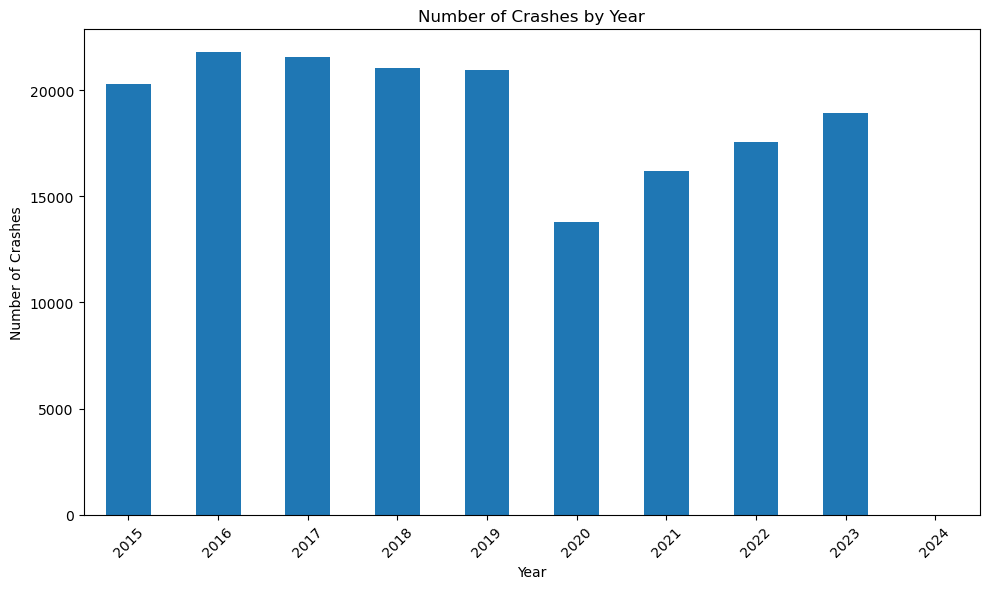

In [9]:

data['Crash Date/Time'] = pd.to_datetime(data['Crash Date/Time'])

# Extracting year from "Crash Date/Time" column
data['Year'] = data['Crash Date/Time'].dt.year

# Counting occurrences of crashes for each year
crashes_by_year = data['Year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
crashes_by_year.plot(kind='bar')
plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


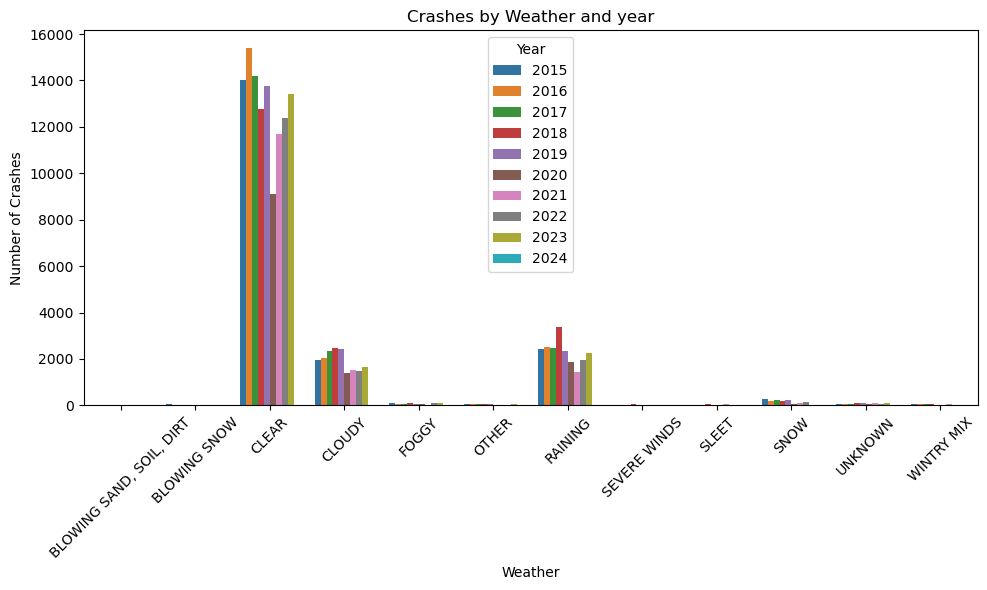

In [10]:
import seaborn as sns

data['Crash Date/Time'] = pd.to_datetime(data['Crash Date/Time'])
# Extracting year from "Crash Date/Time" column
data['Year'] = data['Crash Date/Time'].dt.year


# Grouping the data by weather and time of day and counting occurrences
weather_time_counts = data.groupby(['Weather', 'Year']).size().reset_index(name='Counts')

# Plotting the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather', y='Counts', hue='Year', data=weather_time_counts)
plt.title('Crashes by Weather and year')
plt.xlabel('Weather')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout() 
plt.show()


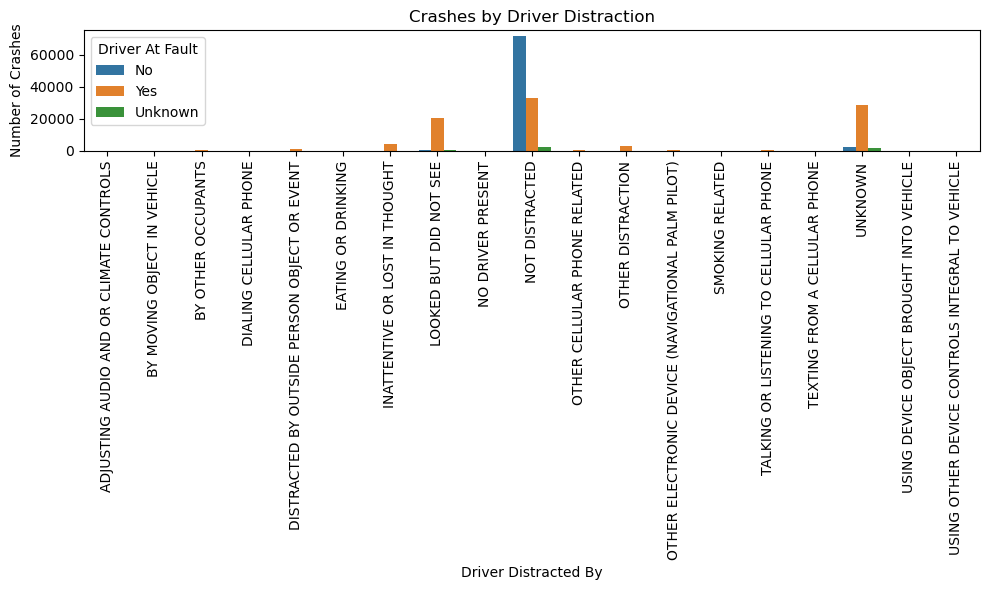

In [11]:


data['Crash Date/Time'] = pd.to_datetime(data['Crash Date/Time'])
# Extracting year from "Crash Date/Time" column
data['Year'] = data['Crash Date/Time'].dt.year


# Grouping the data by weather and time of day and counting occurrences
driver_info = data.groupby(['Driver Distracted By', 'Driver At Fault']).size().reset_index(name='Counts')

# Plotting the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Driver Distracted By', y='Counts', hue='Driver At Fault', data=driver_info)
plt.title('Crashes by Driver Distraction')
plt.xlabel('Driver Distracted By')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.legend(title='Driver At Fault')
plt.tight_layout() 
plt.show()


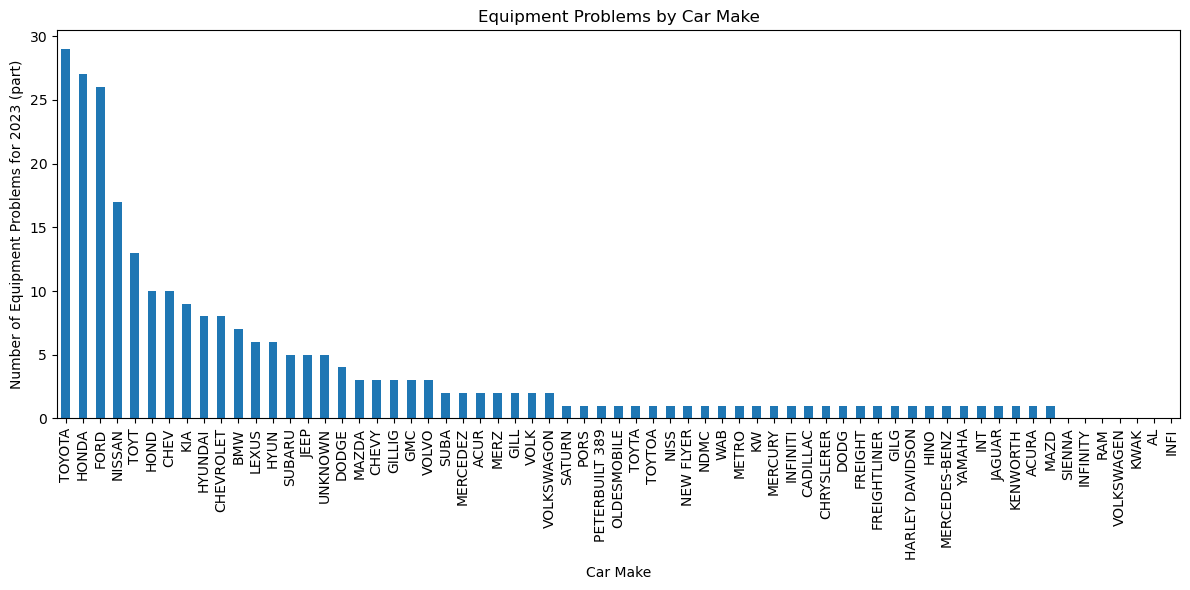

In [12]:
data_2023= data[data['Year']==2023]

data_2023 = data_2023.head(300)
# Group by 'Make' and count occurrences of 'Equipment Problems'
equipment_by_make = data_2023.groupby('Vehicle Make')['Equipment Problems'].count().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 6))
equipment_by_make.plot(kind='bar')
plt.title('Equipment Problems by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Number of Equipment Problems for 2023 (part)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## this may mean that toyota has more market share in this area

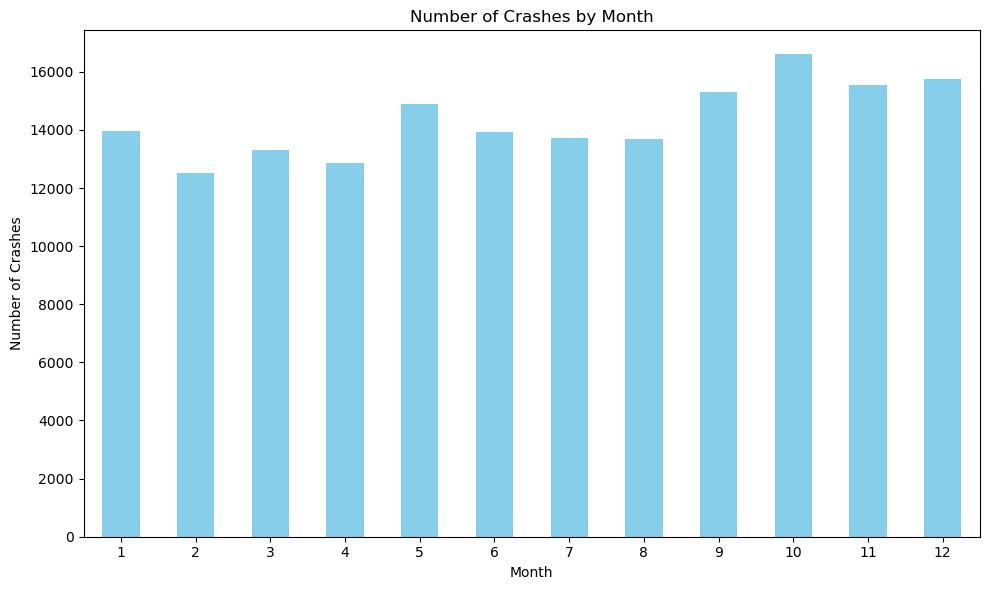

In [13]:
#group by month
# Extract month from "Crash Date/Time" column
data['Month'] = data['Crash Date/Time'].dt.month

# Count occurrences of crashes for each month
crashes_by_month = data['Month'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6))
crashes_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## from this data, October has the most crashes. 

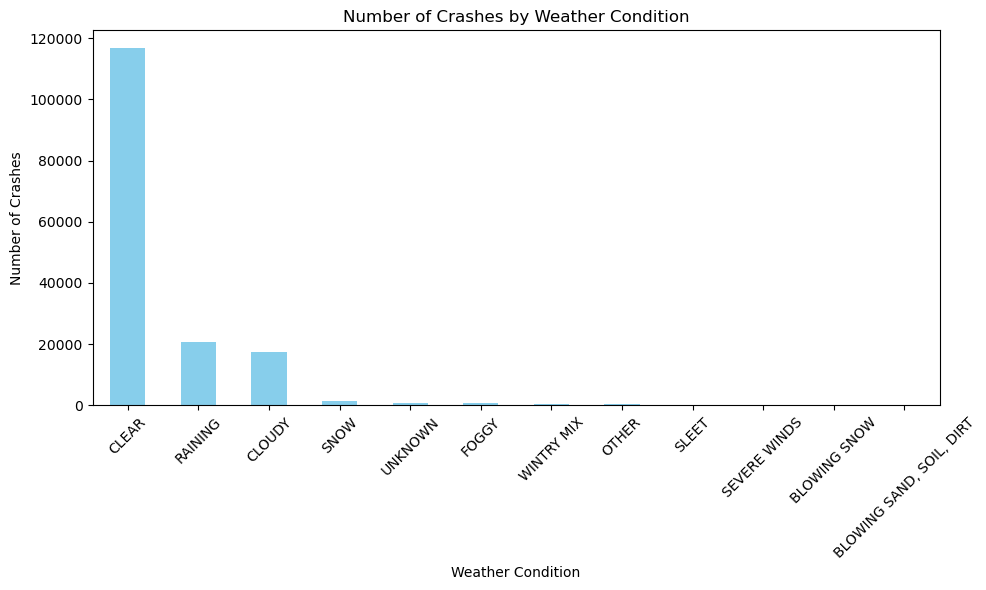

In [14]:
#number of crashes by weather condition

# Group by weather condition and count occurrences of crashes
crashes_by_weather = data['Weather'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
crashes_by_weather.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


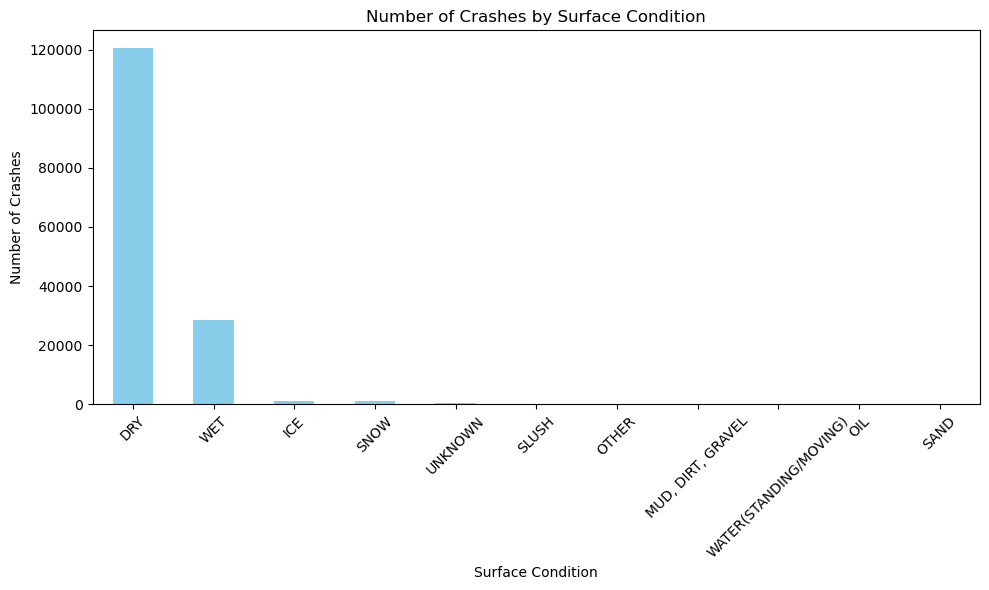

In [15]:
#number of crashes by Surface Condition

# Group by weather condition and count occurrences of crashes
crashes_by_Surface = data['Surface Condition'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
crashes_by_Surface.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Surface Condition')
plt.xlabel('Surface Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

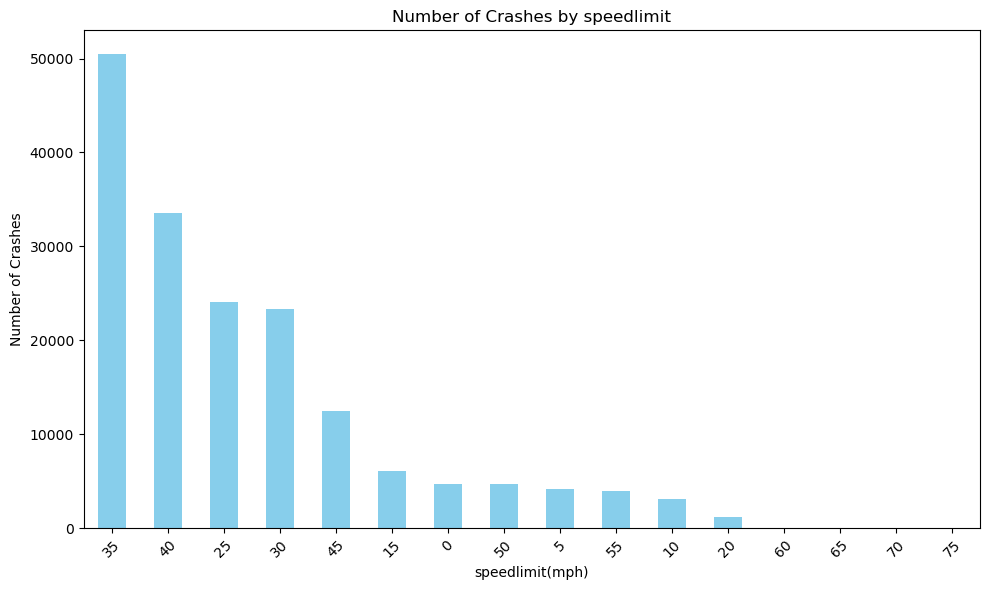

In [16]:
#number of crashes by Speed Limit 

# Group by weather condition and count occurrences of crashes
crashes_by_speedlimit = data['Speed Limit'].value_counts()


plt.figure(figsize=(10, 6))
crashes_by_speedlimit.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by speedlimit')
plt.xlabel('speedlimit(mph)')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

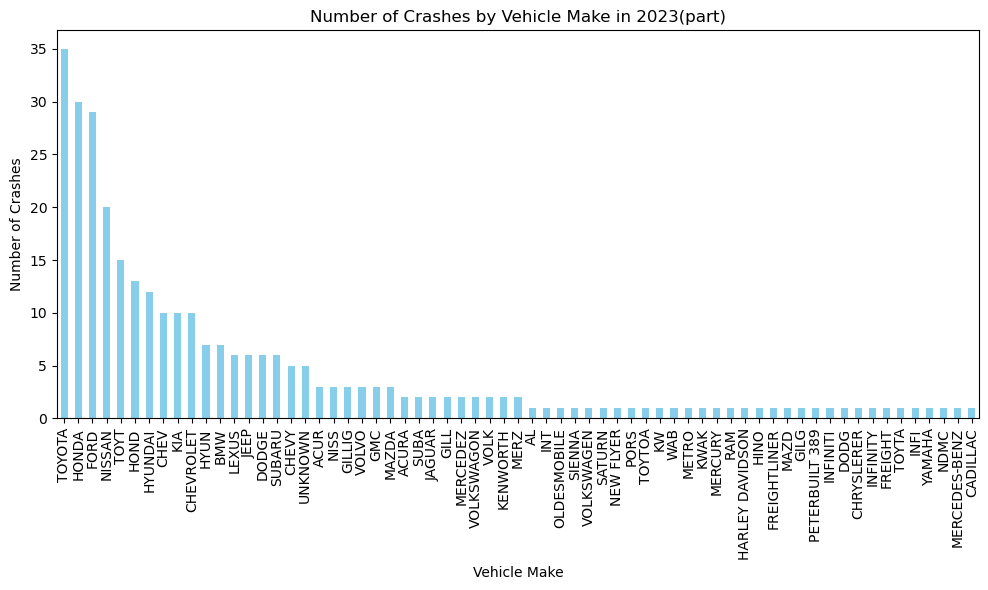

In [17]:
#number of crashes by Vehicle Make 

# Group by weather condition and count occurrences of crashes
crashes_by_speedlimit = data_2023['Vehicle Make'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
crashes_by_speedlimit.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Vehicle Make in 2023(part)')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## There are duplicate vehicle-make based on spelling

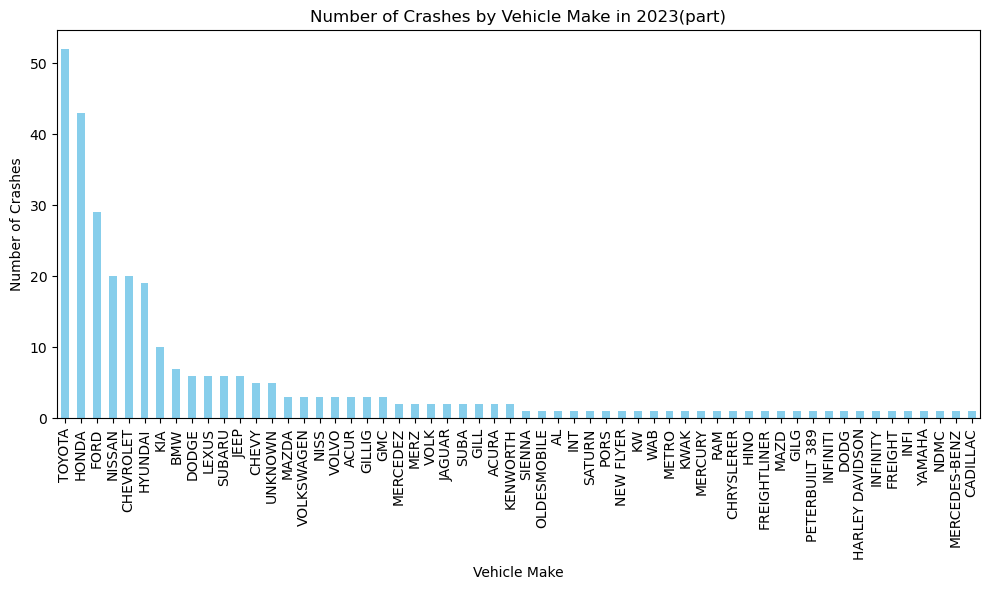

In [18]:

replacements = {
    'TOYOT': 'TOYOTA',
    'NISSA': 'NISSAN',
    'HOND' :'HONDA',
    'CHEV': 'CHEVROLET',
    'HYUN': 'HYUNDAI',
    'VOLKSWAGON': 'VOLKSWAGEN',
    'TOYT': 'TOYOTA',
    'TOYTA': 'TOYOTA',
    'TOYTOA': 'TOYOTA'
}

# Replace the values in the 'Vehicle Make' column
data_2023['Vehicle Make'] = data_2023['Vehicle Make'].replace(replacements)


crashes_by_make = data_2023['Vehicle Make'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
crashes_by_make.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Vehicle Make in 2023(part)')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


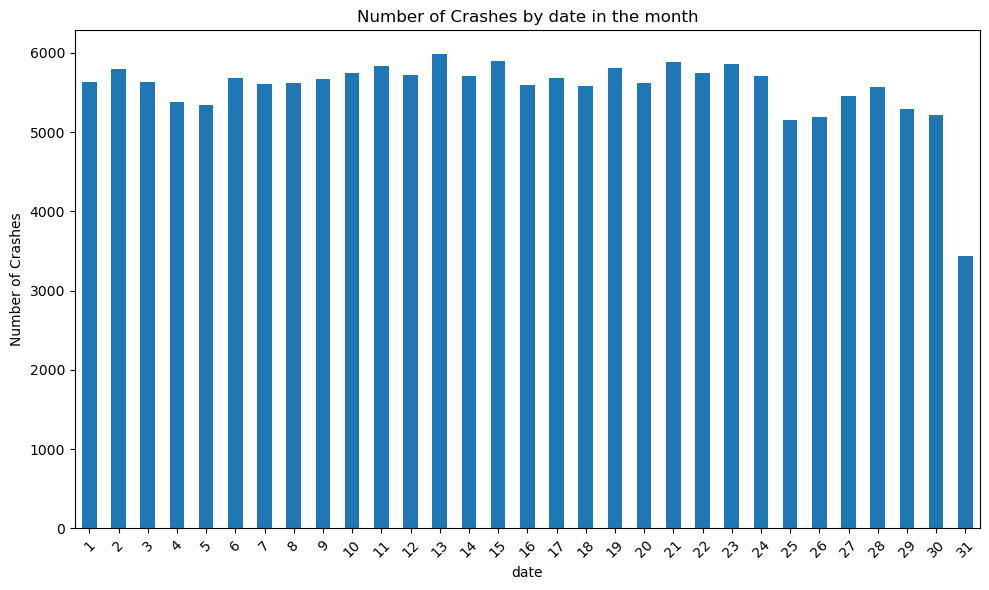

In [19]:
# Extract year from "Crash Date/Time" column
data['day'] = data['Crash Date/Time'].dt.day

# Count occurrences of crashes for each year
crashes_by_date = data['day'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6))
crashes_by_date.plot(kind='bar')
plt.title('Number of Crashes by date in the month')
plt.xlabel('date')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## handling missing values

In [20]:
data.isnull().sum()
data_cleaned = data.dropna()
data_cleaned.isnull().sum()

Crash Date/Time                   0
Route Type                        0
Road Name                         0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Driver At Fault                   0
Injury Severity                   0
Driver Distracted By              0
Vehicle Damage Extent             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Speed Limit                       0
Driverless Vehicle                0
Vehicle Year                      0
Vehicle Make                      0
Vehicle Model                     0
Equipment Problems                0
Latitude                          0
Longitude                         0
Location                          0
Year                              0
Month                       

In [21]:
data_cleaned

,Crash Date/Time,Route Type,Road Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,...,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Year,Month,day
1,2023-12-16 12:36:00,Maryland (State),GERMANTOWN RD,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)",2023,12,16
2,2023-12-29 12:00:00,Maryland (State),GREAT SENECA HWY,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)",2023,12,29
3,2023-11-05 21:07:00,Maryland (State),WOODFIELD RD,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,No,...,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)",2023,11,5
5,2023-12-29 12:00:00,Maryland (State),GREAT SENECA HWY,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,...,1991,MERCEDES-BENZ,L350,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)",2023,12,29
6,2023-12-17 17:43:00,Maryland (State),GEORGIA AVE,STRAIGHT MOVEMENT ANGLE,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,Yes,...,2015,TOYOTA,COROLLA,NO MISUSE,38.995899,-77.028188,"(38.99589921, -77.02818753)",2023,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172094,2019-02-25 07:55:00,County,GOSHEN RD,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,2015,LINC,MKZ,NO MISUSE,39.158588,-77.192067,"(39.15858833, -77.19206667)",2019,2,25
172098,2022-10-29 06:01:00,Maryland (State),GEORGIA AVE,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,...,2017,CHEVY,EQUINOX,NO MISUSE,39.041368,-77.051923,"(39.04136833, -77.05192333)",2022,10,29
172099,2018-03-25 14:10:00,Municipality,BROADWOOD DR,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,No,...,2008,CHEVROLET,EQUINOX,NO MISUSE,39.077970,-77.122989,"(39.07797, -77.122989)",2018,3,25
172102,2020-11-23 07:37:00,Maryland (State),RIDGE RD,SAME DIR REAR END,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,No,...,2008,CHEVROLET,EXPRESS,NO MISUSE,39.228963,-77.236757,"(39.22896333, -77.23675667)",2020,11,23


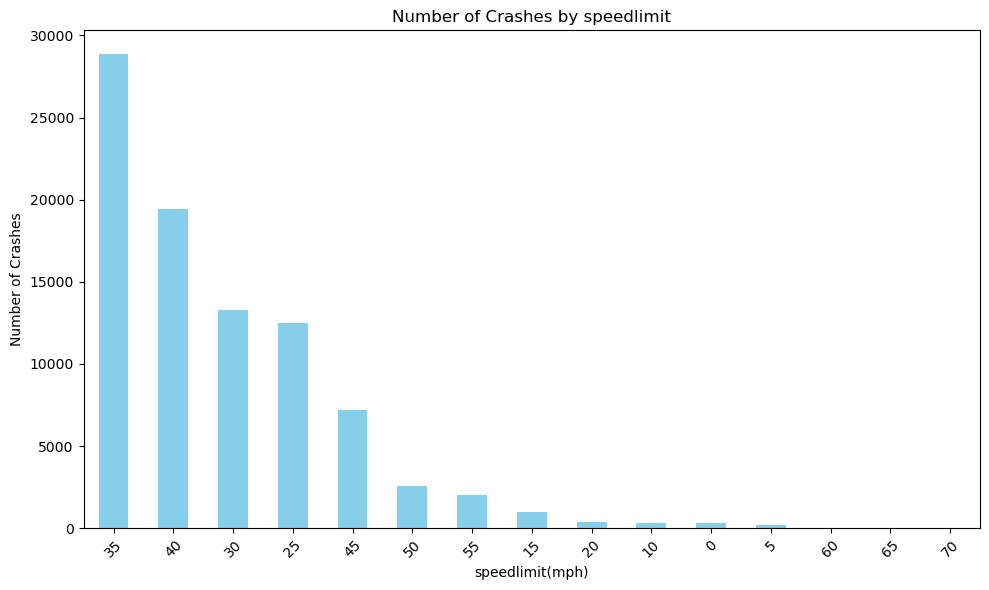

In [22]:
#number of crashes by Speed Limit 

# Group by weather condition and count occurrences of crashes
crashes_by_speedlimit = data_cleaned['Speed Limit'].value_counts()


plt.figure(figsize=(10, 6))
crashes_by_speedlimit.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by speedlimit')
plt.xlabel('speedlimit(mph)')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

## check for associativity to determine the important features

In [23]:
selected_features = ['Crash Date/Time', 'Route Type', 'Road Name', 'Collision Type',                    
'Weather'  ,                     
'Surface Condition',                
'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault',   
'Injury Severity',                   
'Driver Distracted By',              
'Vehicle Damage Extent',             
'Vehicle First Impact Location',     
'Vehicle Second Impact Location',    
'Vehicle Body Type',                 
'Vehicle Movement',                  
'Speed Limit',                       
'Driverless Vehicle',                
'Vehicle Year',                      
'Vehicle Make',                      
'Vehicle Model',                     
'Equipment Problems',                
'Latitude',                          
'Longitude',                         
'Location',                          
'Year']

In [24]:
#checking for associativity between Injury severity and other features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for i in selected_features:
    cramers_v_value = cramers_v(data_cleaned[i], data_cleaned['Injury Severity'])
    print(f"Cramér's V: {cramers_v_value}")


Cramér's V: 0.27892438467578884
Cramér's V: 0.020557011630088353
Cramér's V: 0.0
Cramér's V: 0.09388476968568064
Cramér's V: 0.010525968685822774
Cramér's V: 0.008339723601982882
Cramér's V: 0.012715026313591136
Cramér's V: 0.02356406469966561
Cramér's V: 0.06306052813969294
Cramér's V: 0.08718902330484758
Cramér's V: 0.9999999999999999
Cramér's V: 0.04593128435498612
Cramér's V: 0.16211948438459892
Cramér's V: 0.05747020731641539
Cramér's V: 0.0626751897486933
Cramér's V: 0.12436470407342717
Cramér's V: 0.062002270793611876
Cramér's V: 0.04308045525273389
Cramér's V: 0.011354304923843329
Cramér's V: 0.02367008724278779
Cramér's V: 0.1353270621475385
Cramér's V: 0.26607018116465986
Cramér's V: 0.08102355506427612
Cramér's V: 0.27760907748499114
Cramér's V: 0.2700636683956708
Cramér's V: 0.27657388254506493
Cramér's V: 0.03420897493857649


In [25]:
#checking for associativity between Vehicle Damage Extenty and other features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for i in selected_features:
    cramers_v_value = cramers_v(data_cleaned[i], data_cleaned['Vehicle Damage Extent'])
    print(f"Cramér's V: {cramers_v_value}")
    
    
   

Cramér's V: 0.37926002258770847
Cramér's V: 0.02806063994125352
Cramér's V: 0.16341140133131843
Cramér's V: 0.18169569366686136
Cramér's V: 0.04328630855951049
Cramér's V: 0.03938309144044716
Cramér's V: 0.053810791721412995
Cramér's V: 0.04743351916124746
Cramér's V: 0.24682518763304484
Cramér's V: 0.15441062370164108
Cramér's V: 0.16211948438459892
Cramér's V: 0.13134630979937917
Cramér's V: 1.0
Cramér's V: 0.25260688425331795
Cramér's V: 0.25907627344761724
Cramér's V: 0.1945060456872853
Cramér's V: 0.1730318005898646
Cramér's V: 0.06328720364274253
Cramér's V: 0.07333205300380247
Cramér's V: 0.16641650889043233
Cramér's V: 0.22300243128220243
Cramér's V: 0.23510781641185277
Cramér's V: 0.20299530877777983
Cramér's V: 0.3828020043725179
Cramér's V: 0.3707996080322622
Cramér's V: 0.3821457691023575
Cramér's V: 0.02318959599459624


## we'll use features that have values 0.1 and up

In [25]:
best_features = ['Crash Date/Time',  'Collision Type',                    
 'Driver Substance Abuse', 'Driver At Fault',   
'Injury Severity',                   
'Driver Distracted By',              
'Vehicle Damage Extent', 
'Vehicle First Impact Location',     
'Vehicle Second Impact Location',  
'Vehicle Body Type',                 
'Vehicle Movement',                  
'Speed Limit',   
'Driverless Vehicle',          
'Vehicle Year',
'Vehicle Make',                      
'Vehicle Model',                  
'Equipment Problems',       
'Latitude',                          
'Longitude'
]
      
  
         
                         
                         


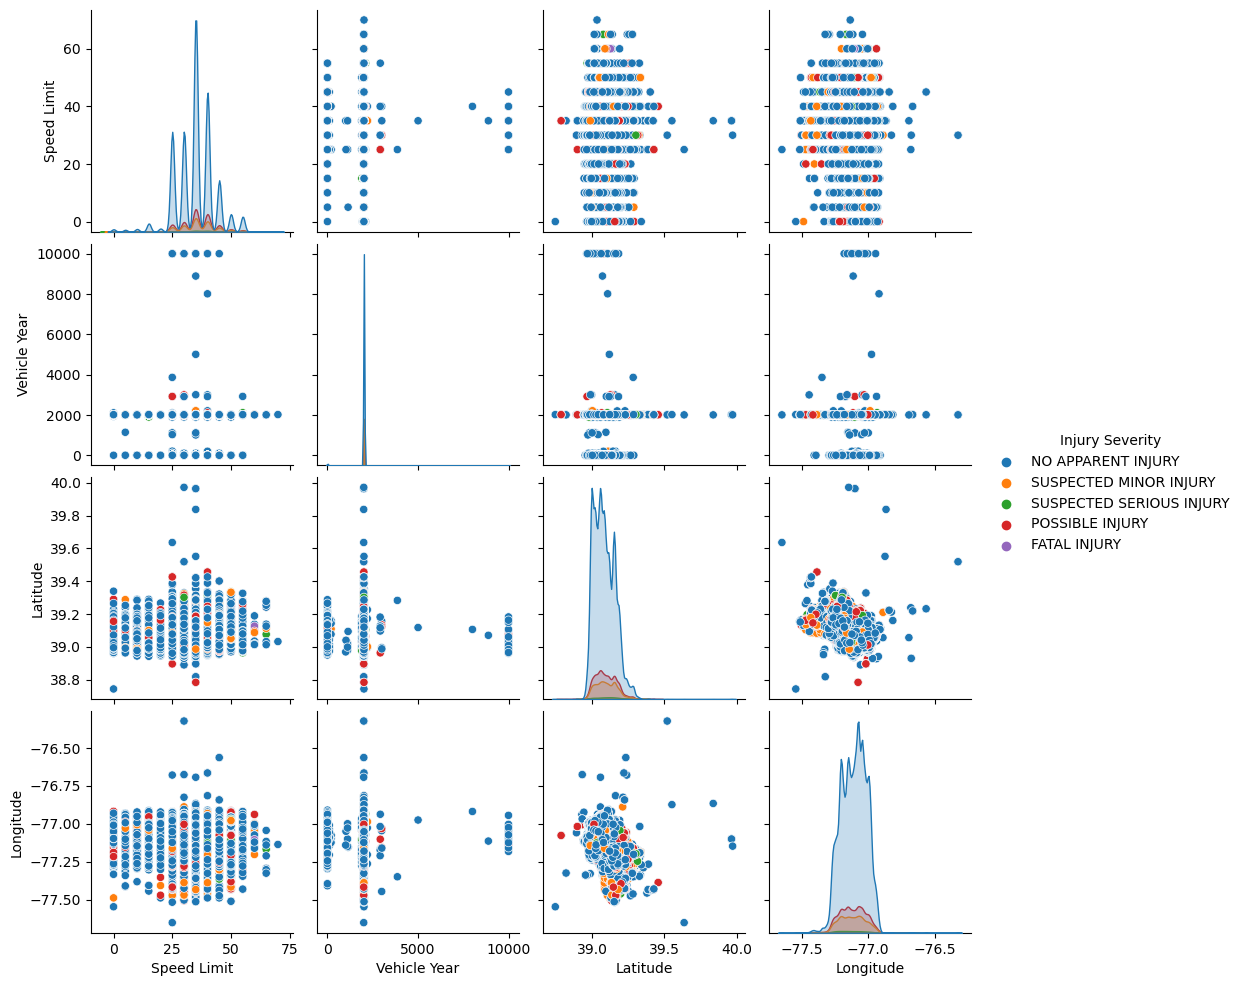

In [31]:

sns.pairplot(data_cleaned[best_features], hue='Injury Severity')
plt.show()



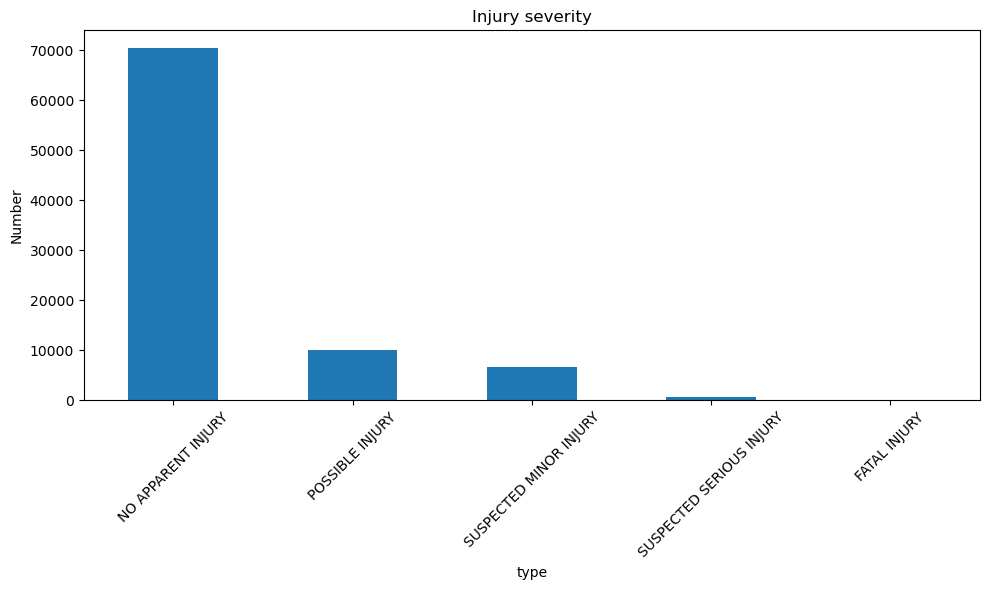

In [26]:

# Extract year from "Crash Date/Time" column
#data['day'] = data['Crash Date/Time'].dt.day

# Count occurrences of crashes for each year
Inj_sev = data_cleaned['Injury Severity'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
Inj_sev.plot(kind='bar')
plt.title('Injury severity')
plt.xlabel('type')
plt.ylabel('Number')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


## since the speed limits in this study never exceeded 55, it could be the reason why there were no fatal injury recorded

## The data set is clearly imbalanced so lets try downsampling and upsampling

In [27]:
(data_cleaned['Injury Severity']== 'SUSPECTED SERIOUS INJURY').sum()

740

In [28]:
#down sample no apparent injury and possibe injury to the length of suspected minor injury,
#upsampled suspected serious injury t the length of susppected minor injury
from sklearn.utils import resample




# Now we have a DataFrame where each row represents an instance
# Split the dataset into a DataFrame for each category
df_no_injury = data_cleaned[data_cleaned['Injury Severity'] == 'NO APPARENT INJURY']
df_possible_injury = data_cleaned[data_cleaned['Injury Severity'] == 'POSSIBLE INJURY']
df_minor_injury = data_cleaned[data_cleaned['Injury Severity'] == 'SUSPECTED MINOR INJURY']
df_serious_injury = data_cleaned[data_cleaned['Injury Severity'] == 'SUSPECTED SERIOUS INJURY']
df_fatal_injury = data_cleaned[data_cleaned['Injury Severity'] == 'FATAL INJURY']

# Find the number of samples in the smallest class
#n_samples = min(len(df_no_injury), len(df_possible_injury), len(df_minor_injury))
n_samples =  len(df_minor_injury)
# Downsample each DataFrame
df_no_injury_downsampled = resample(df_no_injury, replace=False, n_samples=n_samples, random_state=123)
df_possible_injury_downsampled = resample(df_possible_injury, replace=False, n_samples=n_samples, random_state=123)
#df_minor_injury_downsampled = resample(df_minor_injury, replace=False, n_samples=n_samples, random_state=123)
df_serious_injury_upsampled = resample(df_serious_injury, replace=True, n_samples=n_samples, random_state=123)
df_fatal_injury_upsampled = resample(df_fatal_injury, replace=True, n_samples= n_samples, random_state = 123)
# No need to downsample the smallest class

# Combine the downsampled DataFrames back into a single DataFrame
df_downsampled = pd.concat([
    df_no_injury_downsampled,
    df_possible_injury_downsampled,
    df_minor_injury,
    df_serious_injury_upsampled,
    df_fatal_injury_upsampled
    
])

# Shuffle the dataset to mix up the classes
df_downsampled = df_downsampled.sample(frac=1, random_state=123).reset_index(drop=True)


df_downsampled

,Crash Date/Time,Route Type,Road Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,...,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Year,Month,day
0,2019-10-26 11:39:00,Municipality,N WASHINGTON ST,SINGLE VEHICLE,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,...,2016,TOYOTA,COROLLA,NO MISUSE,39.086728,-77.152940,"(39.08672808, -77.15293953)",2019,10,26
1,2022-12-13 18:06:00,Maryland (State),SPENCERVILLE RD,ANGLE MEETS LEFT TURN,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,Yes,...,2008,FORD,EDGE,UNKNOWN,39.109432,-76.935279,"(39.10943167, -76.93527917)",2022,12,13
2,2021-05-22 14:53:00,Maryland (State),LAYTONSVILLE RD,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,...,2021,FORD,F250,NO MISUSE,39.230355,-77.142408,"(39.230355, -77.14240833)",2021,5,22
3,2021-08-05 17:00:00,Maryland (State),FREDERICK RD,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,2009,YAMA,CR,NO MISUSE,39.198136,-77.244735,"(39.1981365, -77.2447345)",2021,8,5
4,2023-01-15 07:23:00,Maryland (State),MUNCASTER MILL RD,HEAD ON,CLEAR,DRY,DAWN,NO CONTROLS,COMBINATION CONTRIBUTED,Yes,...,2015,HONDA,CIVIC,NO MISUSE,39.113125,-77.089977,"(39.113125, -77.08997667)",2023,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33670,2021-10-15 19:10:00,Maryland (State),FREDERICK RD,SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,No,...,2014,HOND,TK,NO MISUSE,39.147303,-77.205349,"(39.14730275, -77.20534875)",2021,10,15
33671,2022-11-15 12:25:00,Maryland (State),ROCKVILLE PIKE,STRAIGHT MOVEMENT ANGLE,RAINING,WET,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,2017,HOND,CRV,NO MISUSE,39.069478,-77.130717,"(39.06947791, -77.13071684)",2022,11,15
33672,2017-01-18 07:39:00,County,MIDDLEBROOK RD,HEAD ON LEFT TURN,CLOUDY,WET,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,...,2013,HYUNDAI,SONATA,NO MISUSE,39.175101,-77.253660,"(39.17510085, -77.25365996)",2017,1,18
33673,2022-07-13 13:50:00,Maryland (State),RIVER RD,ANGLE MEETS LEFT HEAD ON,CLEAR,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,No,...,2012,TOYOTA,CAMRY,NO MISUSE,39.044843,-77.261381,"(39.044843, -77.261381)",2022,7,13


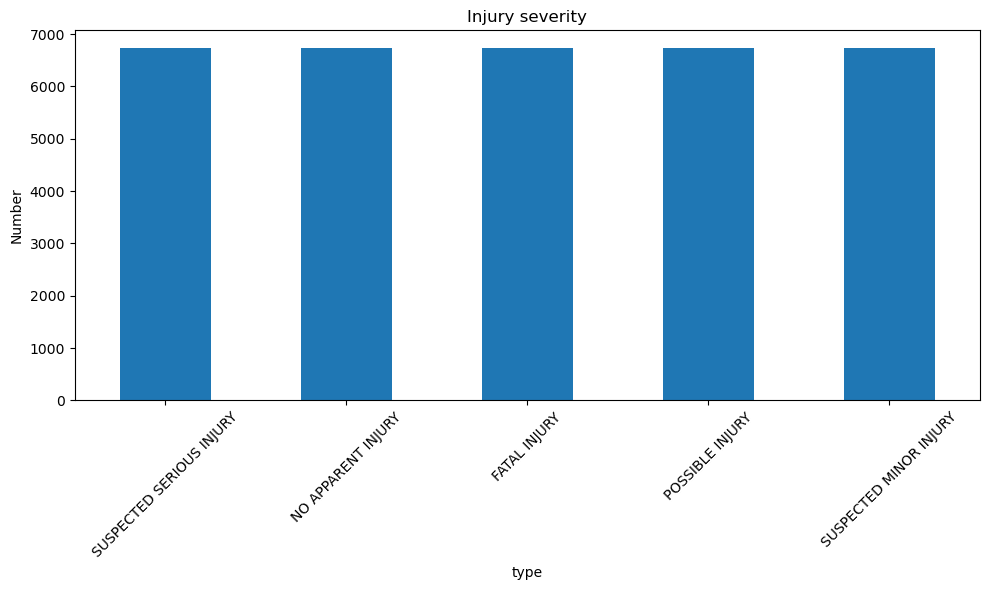

In [29]:

Inj_sev_ud = df_downsampled['Injury Severity'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
Inj_sev_ud.plot(kind='bar')
plt.title('Injury severity')
plt.xlabel('type')
plt.ylabel('Number')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


In [30]:
## there is a need to explicitly denote the order to avoid implicit assumptions


df = pd.DataFrame({
    'Injury Severity': ['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'SUSPECTED SERIOUS INJURY', 'POSSIBLE INJURY', 'FATAL INJURY'],
    'Vehicle Damage Extent':['NO DAMAGE','SUPERFICIAL', 'FUNCTIONAL','DISABLING', 'DESTROYED']
})

# Manual mapping
severity_mapping = {
    'NO APPARENT INJURY': 0,
    'POSSIBLE INJURY':1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4
}
'''damage_mapping ={'SUPERFICIAL':0,
                 'FUNCTIONAL':1,
                 'DISABLING':2,
                 'DESTROYED':3'''

damage_mapping ={'NO DAMAGE':0,
                'SUPERFICIAL':1,
                 'FUNCTIONAL':2,
                 'DISABLING':3,
                 'DESTROYED':4
}

# Apply the mapping to the column
df_downsampled['Injury Severity Encoded'] =df_downsampled['Injury Severity'].map(severity_mapping)
df_downsampled['Vehicle Damage Extent Encoded'] =df_downsampled['Vehicle Damage Extent'].map(damage_mapping)
print(df_downsampled)


          Crash Date/Time        Route Type          Road Name  \
0     2019-10-26 11:39:00      Municipality    N WASHINGTON ST   
1     2022-12-13 18:06:00  Maryland (State)    SPENCERVILLE RD   
2     2021-05-22 14:53:00  Maryland (State)    LAYTONSVILLE RD   
3     2021-08-05 17:00:00  Maryland (State)       FREDERICK RD   
4     2023-01-15 07:23:00  Maryland (State)  MUNCASTER MILL RD   
...                   ...               ...                ...   
33670 2021-10-15 19:10:00  Maryland (State)       FREDERICK RD   
33671 2022-11-15 12:25:00  Maryland (State)     ROCKVILLE PIKE   
33672 2017-01-18 07:39:00            County     MIDDLEBROOK RD   
33673 2022-07-13 13:50:00  Maryland (State)           RIVER RD   
33674 2021-10-19 05:28:00  Maryland (State)    CONNECTICUT AVE   

                 Collision Type  Weather Surface Condition  \
0                SINGLE VEHICLE   CLOUDY               DRY   
1         ANGLE MEETS LEFT TURN    CLEAR               DRY   
2                SING

In [31]:
# OneHotEncoder for nominal data
encoder = OneHotEncoder(dtype=float, sparse_output=False)  # Ensuring output is dense
nominal_data = df_downsampled[['Collision Type', 'Driver Substance Abuse', 'Driver At Fault',
                               'Driver Distracted By', 'Vehicle Body Type','Vehicle First Impact Location',
                               'Vehicle Second Impact Location',  'Vehicle Make', 'Vehicle Body Type',                
                               'Vehicle Movement', 'Driverless Vehicle', 'Vehicle Year','Vehicle Make', 
                               'Vehicle Model','Equipment Problems']]

nominal_encoded = encoder.fit_transform(nominal_data)
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=encoder.get_feature_names_out(nominal_data.columns))

# Combine the nominal encoded data
df_downsampled = pd.concat([df_downsampled, nominal_encoded_df], axis=1)



In [32]:
df_downsampled['Vehicle Damage Extent Encoded'].head(10)

0    4.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
6    4.0
7    3.0
8    4.0
9    2.0
Name: Vehicle Damage Extent Encoded, dtype: float64

In [33]:
#binning long and lat
# Define bin edges
lat_bins = np.linspace( df_downsampled['Latitude'].min(),  df_downsampled['Latitude'].max(), num=10)
lon_bins = np.linspace(df_downsampled['Longitude'].min(),  df_downsampled['Longitude'].max(), num=10)
speed_bins = np.linspace(df_downsampled['Speed Limit'].min(), df_downsampled['Speed Limit'].max(), num=5)

# Digitize/bucketize the latitude and longitude
df_downsampled['Lat_bin'] = np.digitize( df_downsampled['Latitude'], bins=lat_bins)
df_downsampled['Lon_bin'] = np.digitize( df_downsampled['Longitude'], bins=lon_bins)
df_downsampled['speed_bin'] = np.digitize( df_downsampled['Speed Limit'], bins=speed_bins)

print( df_downsampled)
df_downS_features = df_downsampled

          Crash Date/Time        Route Type          Road Name  \
0     2019-10-26 11:39:00      Municipality    N WASHINGTON ST   
1     2022-12-13 18:06:00  Maryland (State)    SPENCERVILLE RD   
2     2021-05-22 14:53:00  Maryland (State)    LAYTONSVILLE RD   
3     2021-08-05 17:00:00  Maryland (State)       FREDERICK RD   
4     2023-01-15 07:23:00  Maryland (State)  MUNCASTER MILL RD   
...                   ...               ...                ...   
33670 2021-10-15 19:10:00  Maryland (State)       FREDERICK RD   
33671 2022-11-15 12:25:00  Maryland (State)     ROCKVILLE PIKE   
33672 2017-01-18 07:39:00            County     MIDDLEBROOK RD   
33673 2022-07-13 13:50:00  Maryland (State)           RIVER RD   
33674 2021-10-19 05:28:00  Maryland (State)    CONNECTICUT AVE   

                 Collision Type  Weather Surface Condition  \
0                SINGLE VEHICLE   CLOUDY               DRY   
1         ANGLE MEETS LEFT TURN    CLEAR               DRY   
2                SING

In [34]:
df_downS_features= df_downS_features.dropna()

df_downS_features.isnull().sum().sum()

0

In [35]:
df_downS_features = df_downsampled.drop(['Collision Type', 'Driver Substance Abuse', 'Driver At Fault',
                     'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Make','Crash Date/Time',
                      'Route Type', 'Road Name', 'Collision Type',  'Weather'  , 'Surface Condition',                
                        'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault','Injury Severity',                   
                'Driver Distracted By','Vehicle Damage Extent', 'Vehicle First Impact Location',
                        'Vehicle Second Impact Location',   'Vehicle Body Type',  'Vehicle Movement',
                        'Driverless Vehicle','Vehicle Year','Vehicle Model','Equipment Problems','Longitude',
                                         'Location',  'Year','Speed Limit','Latitude'], axis=1)

#df_downsampled.drop,([], axis=1)


'''best_features = ['Crash Date/Time',  'Collision Type',                    
 'Driver Substance Abuse', 'Driver At Fault',   
'Injury Severity',                   
'Driver Distracted By',              
'Vehicle Damage Extent',                
'Vehicle Body Type',                 
'Vehicle Movement',                  
'Speed Limit',                                            
'Vehicle Make',                      
'Vehicle Model',                                    
'Latitude',                          
'Longitude','''



"best_features = ['Crash Date/Time',  'Collision Type',                    \n 'Driver Substance Abuse', 'Driver At Fault',   \n'Injury Severity',                   \n'Driver Distracted By',              \n'Vehicle Damage Extent',                \n'Vehicle Body Type',                 \n'Vehicle Movement',                  \n'Speed Limit',                                            \n'Vehicle Make',                      \n'Vehicle Model',                                    \n'Latitude',                          \n'Longitude',"

In [36]:
#Injury Severity as Target
X = df_downS_features.drop(['Injury Severity Encoded'], axis=1)  # Features
y = df_downS_features['Injury Severity Encoded']  # Target variable

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)


In [37]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


y_pred_val = model.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53       658
           1       0.40      0.38      0.39       679
           2       0.44      0.45      0.44       653
           3       0.98      0.99      0.99       684
           4       1.00      1.00      1.00       693

    accuracy                           0.68      3367
   macro avg       0.67      0.67      0.67      3367
weighted avg       0.68      0.68      0.68      3367



In [38]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       679
           1       0.40      0.39      0.39       662
           2       0.45      0.46      0.45       676
           3       0.98      1.00      0.99       641
           4       1.00      1.00      1.00       710

    accuracy                           0.68      3368
   macro avg       0.68      0.68      0.68      3368
weighted avg       0.68      0.68      0.68      3368



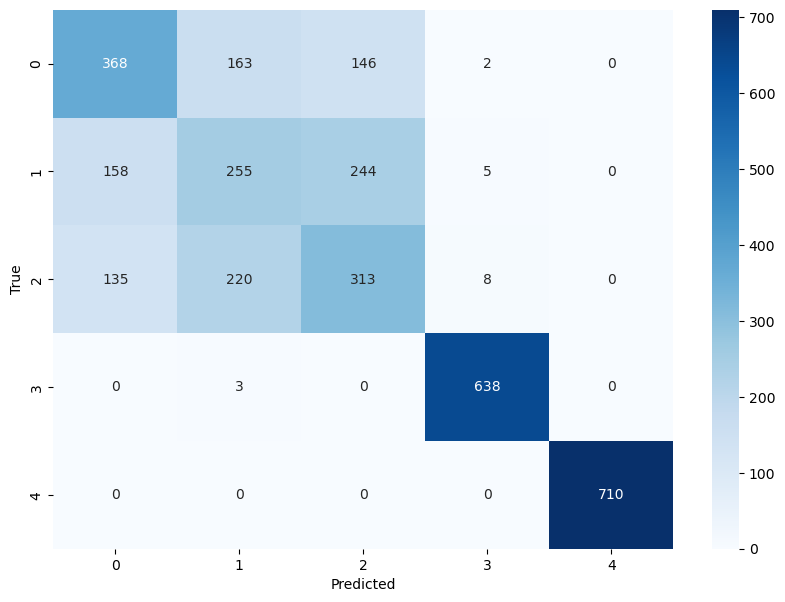

In [39]:
''''NO APPARENT INJURY': 0,
    'POSSIBLE INJURY':1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4'''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

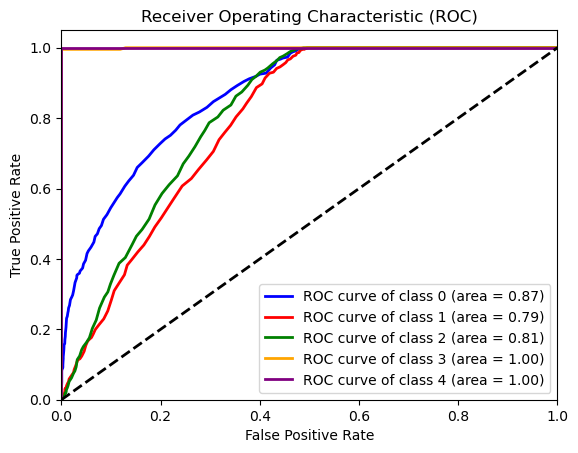

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_pred_proba = model.predict_proba(X_test)

# Binarize the output labels
y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Ensure enough colors for all classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

 ## lets try  Vehicle Damage Extent as the target

In [41]:
 data_cleaned['Vehicle Damage Extent'].isna().sum()

0

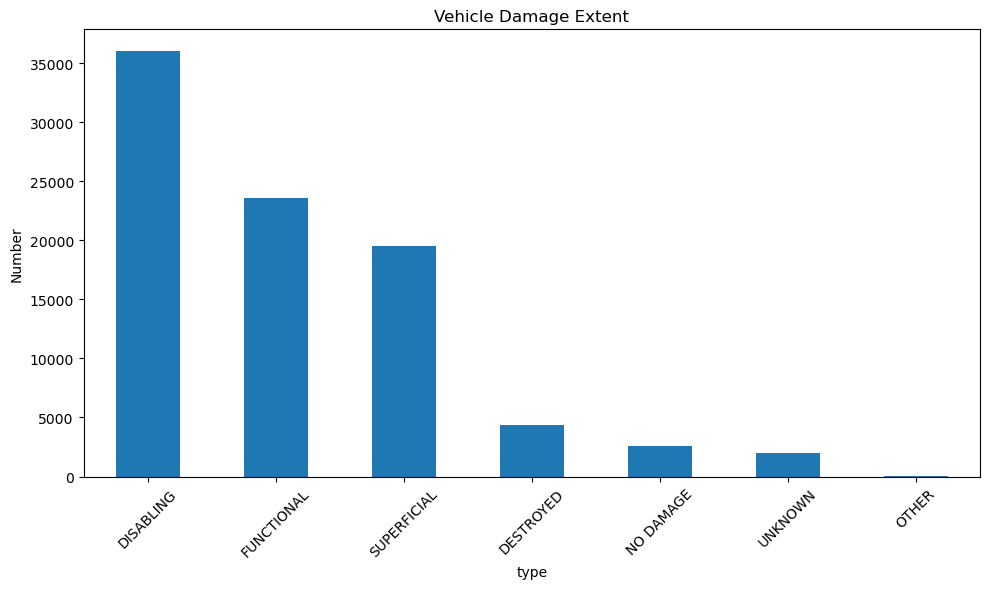

In [42]:

# Extract year from "Crash Date/Time" column
#data['day'] = data['Crash Date/Time'].dt.day

# Count occurrences of crashes for each year
vde = data_cleaned['Vehicle Damage Extent'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
vde.plot(kind='bar')
plt.title('Vehicle Damage Extent')
plt.xlabel('type')
plt.ylabel('Number')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


In [43]:

#upsampled suspected serious injury t the length of susppected minor injury
from sklearn.utils import resample


# Now we have a DataFrame where each row represents an instance
# Split the dataset into a DataFrame for each category
df_destroyed = data_cleaned[data_cleaned['Vehicle Damage Extent'] == 'DESTROYED']
df_disabling = data_cleaned[data_cleaned['Vehicle Damage Extent'] == 'DISABLING']
df_functional = data_cleaned[data_cleaned['Vehicle Damage Extent'] == 'FUNCTIONAL']
df_superficial = data_cleaned[data_cleaned['Vehicle Damage Extent'] == 'SUPERFICIAL']
df_nodamage = data_cleaned[data_cleaned['Vehicle Damage Extent'] == 'NO DAMAGE']

# Find the number of samples in the smallest class
#n_samples = min(len(df_no_injury), len(df_possible_injury), len(df_minor_injury))
n_samples =  len(df_destroyed)
# Downsample each DataFrame
#df_destroyed_downsampled = resample(df_destroyed, replace=False, n_samples=n_samples, random_state=123)
df_disabling_downsampled = resample(df_disabling, replace=False, n_samples=n_samples, random_state=123)
df_functional_downsampled = resample(df_functional, replace=False, n_samples=n_samples, random_state=123)
df_superficial_downsampled = resample(df_superficial, replace=False, n_samples=n_samples, random_state=123)
df_nodamage_upsampled = resample(df_nodamage, replace=True, n_samples= n_samples, random_state = 123)
# No need to downsample the smallest class

# Combine the downsampled DataFrames back into a single DataFrame
df_downsampled = pd.concat([
    df_destroyed, 
df_disabling_downsampled,
df_functional_downsampled, 
df_superficial_downsampled,
df_nodamage_upsampled
    
])

# Shuffle the dataset to mix up the classes
df_downsampled = df_downsampled.sample(frac=1, random_state=123).reset_index(drop=True)


df_downsampled

,Crash Date/Time,Route Type,Road Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,...,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Year,Month,day
0,2015-01-22 12:39:00,Maryland (State),WISCONSIN AVE,SAME DIR REAR END,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,...,2011,HONDA,ODYSSEY,NO MISUSE,38.963070,-77.087693,"(38.96307, -77.08769333)",2015,1,22
1,2018-02-27 11:00:00,US (State),COLESVILLE RD,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,...,2013,NISSAN,SENTRA,NO MISUSE,39.020382,-77.013117,"(39.02038167, -77.01311667)",2018,2,27
2,2022-04-13 15:00:00,County,GAITHER RD,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,No,...,2020,MOGU,V7III,NO MISUSE,39.117536,-77.184429,"(39.11753596, -77.18442943)",2022,4,13
3,2022-06-03 21:02:00,Municipality,MONTGOMERY AVE,SAME DIRECTION SIDESWIPE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,Yes,...,2011,TOYOTA,SIENNA,NO MISUSE,39.146406,-77.202680,"(39.14640567, -77.2026795)",2022,6,3
4,2016-08-03 14:23:00,Maryland (State),GEORGIA AVE,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,PERSON,NONE DETECTED,No,...,2011,VOLV,TK,NO MISUSE,39.235098,-77.055962,"(39.23509833, -77.05596167)",2016,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21985,2020-12-17 10:45:00,Maryland (State),CONNECTICUT AVE,SAME DIR REAR END,WINTRY MIX,WET,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,...,2018,CHEVY,SILVERADO,NO MISUSE,39.048492,-77.075553,"(39.04849167, -77.07555333)",2020,12,17
21986,2018-02-12 12:15:00,County,WAYNE AVE,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,...,2011,GILL,BUS,NO MISUSE,38.994213,-77.029148,"(38.99421333, -77.02914833)",2018,2,12
21987,2021-05-04 08:28:00,US (State),COLESVILLE RD,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,...,2008,HOND,TK,NO MISUSE,39.007750,-77.019831,"(39.00775, -77.01983133)",2021,5,4
21988,2023-02-19 17:00:00,Maryland (State),GEORGIA AVE,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,No,...,2023,TOYT,4S,NO MISUSE,38.995338,-77.027905,"(38.99533833, -77.027905)",2023,2,19


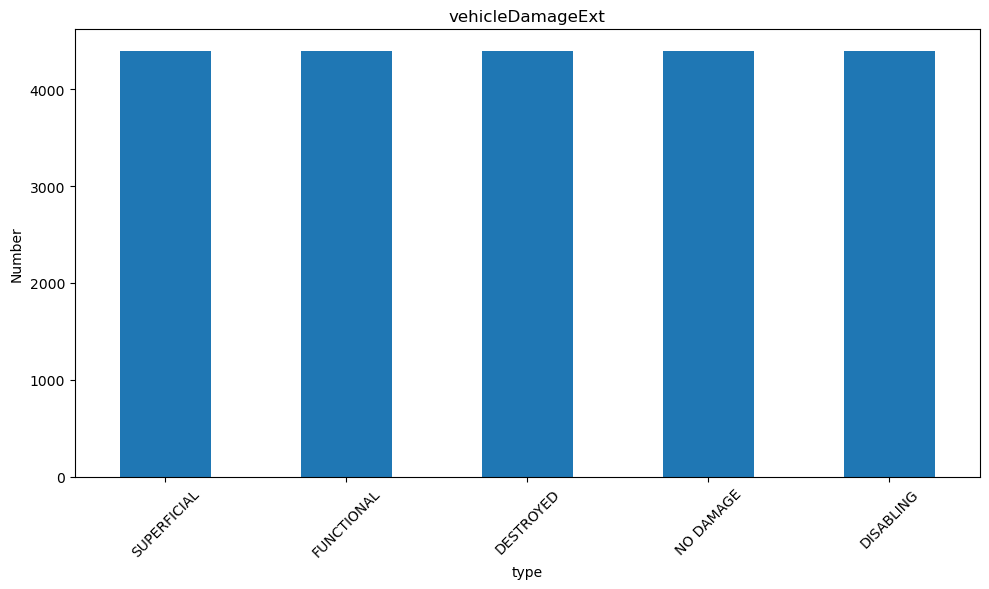

In [44]:

vehicleDamageExt = df_downsampled['Vehicle Damage Extent'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
vehicleDamageExt.plot(kind='bar')
plt.title('vehicleDamageExt')
plt.xlabel('type')
plt.ylabel('Number')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


In [45]:
## there is a need to explicitly denote the order to avoid implicit assumptions


df = pd.DataFrame({
    'Injury Severity': ['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'SUSPECTED SERIOUS INJURY', 'POSSIBLE INJURY', 'FATAL INJURY'],
    'Vehicle Damage Extent':['NO DAMAGE','SUPERFICIAL', 'FUNCTIONAL','DISABLING', 'DESTROYED']
})

# Manual mapping
severity_mapping = {
    'NO APPARENT INJURY': 0,
    'POSSIBLE INJURY':1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4
}
'''damage_mapping ={'SUPERFICIAL':0,
                 'FUNCTIONAL':1,
                 'DISABLING':2,
                 'DESTROYED':3'''

damage_mapping ={'NO DAMAGE':0,
                'SUPERFICIAL':1,
                 'FUNCTIONAL':2,
                 'DISABLING':3,
                 'DESTROYED':4
}

# Apply the mapping to the column
df_downsampled['Injury Severity Encoded'] =df_downsampled['Injury Severity'].map(severity_mapping)
df_downsampled['Vehicle Damage Extent Encoded'] =df_downsampled['Vehicle Damage Extent'].map(damage_mapping)
print(df_downsampled)


          Crash Date/Time        Route Type        Road Name  \
0     2015-01-22 12:39:00  Maryland (State)    WISCONSIN AVE   
1     2018-02-27 11:00:00        US (State)    COLESVILLE RD   
2     2022-04-13 15:00:00            County       GAITHER RD   
3     2022-06-03 21:02:00      Municipality   MONTGOMERY AVE   
4     2016-08-03 14:23:00  Maryland (State)      GEORGIA AVE   
...                   ...               ...              ...   
21985 2020-12-17 10:45:00  Maryland (State)  CONNECTICUT AVE   
21986 2018-02-12 12:15:00            County        WAYNE AVE   
21987 2021-05-04 08:28:00        US (State)    COLESVILLE RD   
21988 2023-02-19 17:00:00  Maryland (State)      GEORGIA AVE   
21989 2021-05-21 20:40:00  Maryland (State)      GEORGIA AVE   

                 Collision Type     Weather Surface Condition           Light  \
0             SAME DIR REAR END      CLOUDY               DRY        DAYLIGHT   
1             SAME DIR REAR END       CLEAR               DRY        

In [46]:


# OneHotEncoder for nominal data
encoder = OneHotEncoder(dtype=float, sparse_output=False)  # Ensuring output is dense
nominal_data = df_downsampled[['Collision Type', 'Driver Substance Abuse', 'Driver At Fault',
                               'Driver Distracted By', 'Vehicle Body Type','Vehicle First Impact Location',
                               'Vehicle Second Impact Location',  'Vehicle Make', 'Vehicle Body Type',                
                               'Vehicle Movement', 'Driverless Vehicle', 'Vehicle Year','Vehicle Make', 
                               'Vehicle Model','Equipment Problems']]

nominal_encoded = encoder.fit_transform(nominal_data)
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=encoder.get_feature_names_out(nominal_data.columns))

# Combine the nominal encoded data
df_downsampled = pd.concat([df_downsampled, nominal_encoded_df], axis=1)


In [47]:
#binning long and lat
# Define bin edges
lat_bins = np.linspace( df_downsampled['Latitude'].min(),  df_downsampled['Latitude'].max(), num=10)
lon_bins = np.linspace(df_downsampled['Longitude'].min(),  df_downsampled['Longitude'].max(), num=10)
speed_bins = np.linspace(df_downsampled['Speed Limit'].min(), df_downsampled['Speed Limit'].max(), num=5)

# Digitize/bucketize the latitude and longitude
df_downsampled['Lat_bin'] = np.digitize( df_downsampled['Latitude'], bins=lat_bins)
df_downsampled['Lon_bin'] = np.digitize( df_downsampled['Longitude'], bins=lon_bins)
df_downsampled['speed_bin'] = np.digitize( df_downsampled['Speed Limit'], bins=speed_bins)

print( df_downsampled)
df_downS_features = df_downsampled

          Crash Date/Time        Route Type        Road Name  \
0     2015-01-22 12:39:00  Maryland (State)    WISCONSIN AVE   
1     2018-02-27 11:00:00        US (State)    COLESVILLE RD   
2     2022-04-13 15:00:00            County       GAITHER RD   
3     2022-06-03 21:02:00      Municipality   MONTGOMERY AVE   
4     2016-08-03 14:23:00  Maryland (State)      GEORGIA AVE   
...                   ...               ...              ...   
21985 2020-12-17 10:45:00  Maryland (State)  CONNECTICUT AVE   
21986 2018-02-12 12:15:00            County        WAYNE AVE   
21987 2021-05-04 08:28:00        US (State)    COLESVILLE RD   
21988 2023-02-19 17:00:00  Maryland (State)      GEORGIA AVE   
21989 2021-05-21 20:40:00  Maryland (State)      GEORGIA AVE   

                 Collision Type     Weather Surface Condition           Light  \
0             SAME DIR REAR END      CLOUDY               DRY        DAYLIGHT   
1             SAME DIR REAR END       CLEAR               DRY        

In [48]:
df_downS_features= df_downS_features.dropna()

df_downS_features.isnull().sum().sum()

0

In [49]:
df_downS_features = df_downsampled.drop(['Collision Type', 'Driver Substance Abuse', 'Driver At Fault',
                     'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Make','Crash Date/Time',
                      'Route Type', 'Road Name', 'Collision Type',  'Weather'  , 'Surface Condition',                
                        'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault','Injury Severity',                   
                'Driver Distracted By','Vehicle Damage Extent', 'Vehicle First Impact Location',
                        'Vehicle Second Impact Location',   'Vehicle Body Type',  'Vehicle Movement',
                        'Driverless Vehicle','Vehicle Year','Vehicle Model','Equipment Problems','Longitude',
                                         'Location',  'Year','Speed Limit','Latitude'], axis=1)






In [50]:

X = df_downS_features.drop(['Vehicle Damage Extent Encoded'], axis=1)  # Features
y = df_downS_features['Vehicle Damage Extent Encoded']  # Target variable
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)


In [51]:
X

,Month,day,Injury Severity Encoded,Collision Type_ANGLE MEETS LEFT HEAD ON,Collision Type_ANGLE MEETS LEFT TURN,Collision Type_ANGLE MEETS RIGHT TURN,Collision Type_HEAD ON,Collision Type_HEAD ON LEFT TURN,Collision Type_OPPOSITE DIR BOTH LEFT TURN,Collision Type_OPPOSITE DIRECTION SIDESWIPE,...,Equipment Problems_BELTS/ANCHORS BROKE,Equipment Problems_NO MISUSE,Equipment Problems_NOT STREPPED RIGHT,Equipment Problems_OTHER,Equipment Problems_SIZE/TYPE IMPROPER,Equipment Problems_STRAP/TETHER LOOSE,Equipment Problems_UNKNOWN,Lat_bin,Lon_bin,speed_bin
0,1,22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,4,3
1,2,27,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,5,3
2,4,13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,4,2
3,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,4,2
4,8,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21985,12,17,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,4,3
21986,2,12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,5,2
21987,5,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,5,3
21988,2,19,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,5,2


In [52]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


y_pred_val = model.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       432
           1       0.48      0.39      0.43       442
           2       0.31      0.28      0.30       401
           3       0.39      0.39      0.39       472
           4       0.52      0.57      0.54       452

    accuracy                           0.50      2199
   macro avg       0.49      0.50      0.49      2199
weighted avg       0.49      0.50      0.49      2199



In [53]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       476
           1       0.44      0.42      0.43       441
           2       0.36      0.32      0.34       423
           3       0.39      0.40      0.39       440
           4       0.55      0.60      0.58       419

    accuracy                           0.53      2199
   macro avg       0.51      0.52      0.51      2199
weighted avg       0.52      0.53      0.52      2199



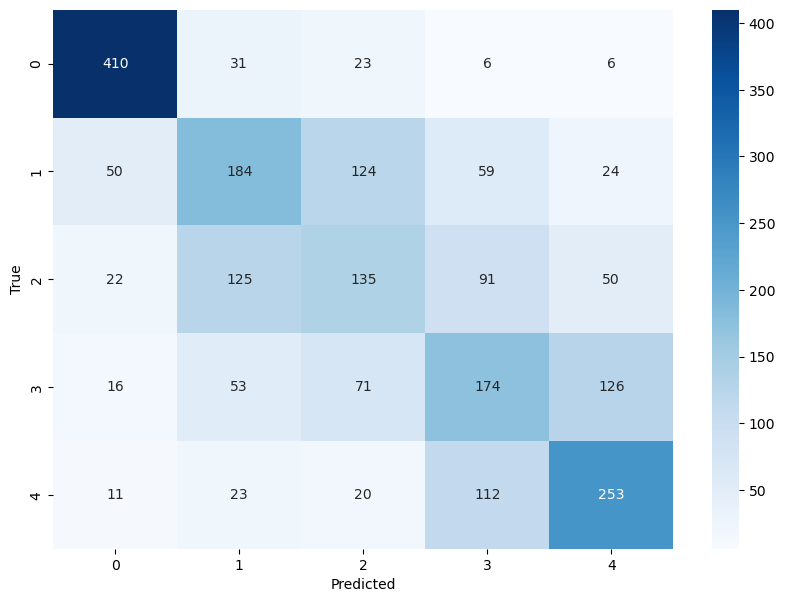

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
'''NO DAMAGE':0,
                'SUPERFICIAL':1,
                 'FUNCTIONAL':2,
                 'DISABLING':3,
                 'DESTROYED':4'''
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

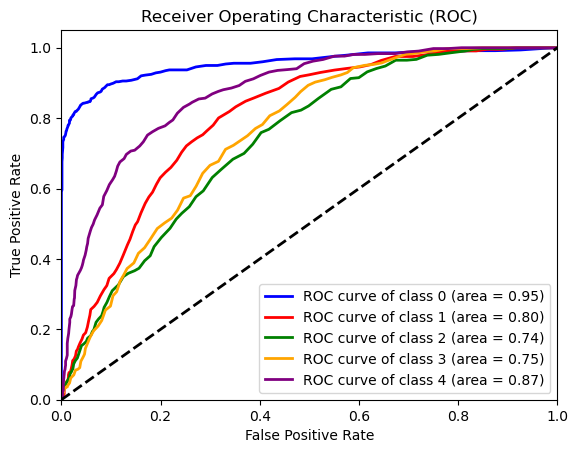

In [56]:
y_pred_proba = model.predict_proba(X_test)

# Binarize the output labels
y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3,4])
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Ensure enough colors for all classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()